<a href="https://colab.research.google.com/github/Emanuel-Baisire/DevelopingDataProducts/blob/master/Malaria_Detector_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

# Mounting the drive
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# How to convert Collab Notebook to HTML
# Download the notebook file >> then upload .ipynb to file/Drive >>> get file path>>> then run a script

%%shell
jupyter nbconvert --to html ///content/Copy_of_Malaria_Detector_Model.ipynb

In [4]:
# Importing libraries required to load the data
import zipfile

import os

from PIL import Image

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler


import tensorflow as tf

from tensorflow.keras import optimizers

# Model Build Libraries

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization

from tensorflow.keras.losses import categorical_crossentropy

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.utils import to_categorical




# To ignore warnings
import warnings

warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", 200)

In [5]:
# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/cell_images.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:

    zip_ref.extractall()

In [6]:
# Storing the path of the extracted "train" folder 
train_dir = '/content/cell_images/train'

# Size of image so that each image has the same size
SIZE = 64

# Empty list to store the training images after they are converted to NumPy arrays
train_images = []

# Empty list to store the training labels (0 - uninfected, 1 - parasitized)
train_labels = []

In [7]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "train" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder
    images_path = os.listdir(train_dir + folder_name)

    for i, image_name in enumerate(images_path):
    
        try:
    
            # Opening each image using the path of that image
            image = Image.open(train_dir + folder_name + image_name)

            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))

            # Converting images to arrays and appending that array to the empty list defined above
            train_images.append(np.array(image))

            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':
                
                train_labels.append(1)
            
            else:
            
                train_labels.append(0)
        
        except Exception:
        
            pass       

# Converting lists to arrays
train_images = np.array(train_images)

train_labels = np.array(train_labels)

In [8]:
# Storing the path of the extracted "test" folder 
test_dir = '/content/cell_images/test'

# Size of image so that each image has the same size (it must be same as the train image size)
SIZE = 64

# Empty list to store the testing images after they are converted to NumPy arrays
test_images = []

# Empty list to store the testing labels (0 - uninfected, 1 - parasitized)
test_labels = []

In [9]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "test" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder
    images_path = os.listdir(test_dir + folder_name)

    for i, image_name in enumerate(images_path):
     
        try:
            # Opening each image using the path of that image
            image = Image.open(test_dir + folder_name + image_name)
            
            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))
            
            # Converting images to arrays and appending that array to the empty list defined above
            test_images.append(np.array(image))
            
            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':
                
                test_labels.append(1)
            
            else:
            
                test_labels.append(0)
        
        except Exception:
        
            pass      

# Converting lists to arrays
test_images = np.array(test_images)

test_labels = np.array(test_labels)           

In [10]:
# Image Normalization


# Try to normalize the train and test images by dividing it by 255 and convert them to float32 using astype function
train_images = (train_images/255).astype('float32')
test_images = (test_images/255).astype('float32')

In [11]:
# One Hot Encoding on the train and test labels

# Encoding Train Labels

train_labels = to_categorical(train_labels, 2)

# Similarly let us try to encode test labels
test_labels = to_categorical(test_labels, 2)

In [12]:
# Clearing backend
from tensorflow.keras import backend

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout  

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from random import shuffle

backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [13]:
# Sample Model Build

# Creating sequential model
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(512, activation = "relu"))

model.add(Dropout(0.4))

model.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons 

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

In [14]:
# Compiling the Model

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [15]:
# Using Callbacks

callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

In [16]:
# Fit the model with min batch size as 32 can tune batch size to some factor of 2^power ] 

history = model.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 101s 159ms/step - loss: 0.4342 - accuracy: 0.7852 - val_loss: 0.1102 - val_accuracy: 0.9479
Epoch 2/20
624/624 [==============================] - 96s 155ms/step - loss: 0.1259 - accuracy: 0.9543 - val_loss: 0.0832 - val_accuracy: 0.9890
Epoch 3/20
624/624 [==============================] - 97s 155ms/step - loss: 0.1012 - accuracy: 0.9679 - val_loss: 0.1285 - val_accuracy: 0.9850
Epoch 4/20
624/624 [==============================] - 96s 154ms/step - loss: 0.0863 - accuracy: 0.9713 - val_loss: 0.0586 - val_accuracy: 0.9890
Epoch 5/20
624/624 [==============================] - 99s 158ms/step - loss: 0.0771 - accuracy: 0.9742 - val_loss: 0.0684 - val_accuracy: 0.9874
Epoch 6/20
624/624 [==============================] - 98s 157ms/step - loss: 0.0688 - accuracy: 0.9766 - val_loss: 0.0703 - val_accuracy: 0.9836


In [17]:
# Evaluating the model on test data

accuracy = model.evaluate(test_images, test_labels, verbose = 1)

print('/n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 4s 41ms/step - loss: 0.0773 - accuracy: 0.9777
/n Test_Accuracy:- 0.9776923060417175


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1300
           1       0.98      0.98      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



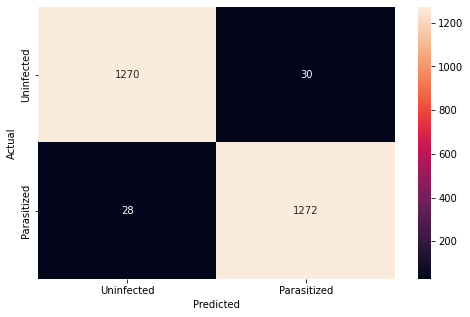

In [18]:
# Plotting the Confusion Matrix

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model.predict(test_images)

pred = np.argmax(pred, axis = 1)

y_true = np.argmax(test_labels, axis = 1)

# Printing the Classification Report

print(classification_report(y_true, pred))

# Plotting the heatmap using Confusion Matrix

cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True, fmt = '.0f', xticklabels= ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()


In [19]:
# Plotting the train and validation curves

# Function to plot train and validation accuracy

def plot_accuracy(history):

  N = len(history.history['accuracy'])

  plt.figure(figsize = (7,7))

  plt.plot(np.arange(0, N), history.history['accuracy'], label = 'train_accuracy', ls = '--' )
  
  plt.plot(np.arange(0,N), history.history['val_accuracy'], label = 'val_accuracy', ls = '--')

  plt.title('Accuracy vs Epoch')

  plt.xlabel('Epochs')

  plt.ylabel('Accuracy')

  plt.legend(loc = 'lower right')


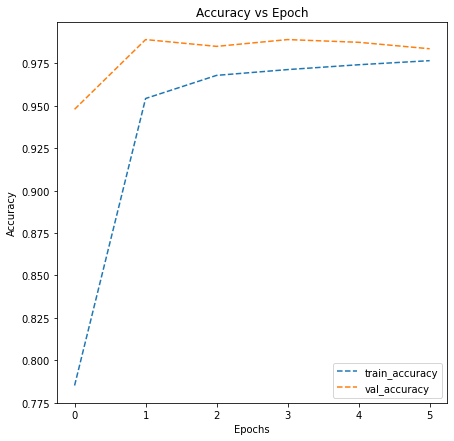

In [20]:
plot_accuracy(history)

**Observation and Insight**

Here we can clearly observe that the training and validation accuracy are increasing
And we can also notice that validation accuracy is slightly higher than the train accuracy

In [21]:
# Model 1 performance Improvement by adding new layers

backend.clear_session()  # Clearing the backend for new model

# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [22]:
model_1 = Sequential()

model_1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))

model_1.add(MaxPooling2D(pool_size = 2))

model_1.add(Dropout(0.2))

 
model_1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))
model_1.add(MaxPooling2D(pool_size = 2))
model_1.add(Dropout(0.2))



model_1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model_1.add(MaxPooling2D(pool_size = 2))

model_1.add(Dropout(0.2))


# New Add 3 new layers with 64 filters

model_1.add(Conv2D(filters = 64, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))
model_1.add(MaxPooling2D(pool_size = 2))
model_1.add(Dropout(0.2))

model_1.add(Conv2D(filters = 64, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))
model_1.add(MaxPooling2D(pool_size = 2))
model_1.add(Dropout(0.2))

model_1.add(Conv2D(filters = 64, kernel_size = 2, padding = "same", activation = "relu"))
model_1.add(MaxPooling2D(pool_size = 2))
model_1.add(Dropout(0.2))




model_1.add(Flatten())

model_1.add(Dense(500, activation = "relu"))

model_1.add(Dropout(0.4))

# Add a new Activation function

model_1.add(Dense(2, activation = "sigmoid")) # 2 represents output layer neurons 

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

In [23]:
# Compile Model 1

model_1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [24]:
# Using Callbacks

callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]


In [25]:
# Fit the model with min batch size as 32 can tune batch size to some factor of 2^power ] 
history_model_1 = model_1.fit(train_images, train_labels, batch_size = 28, callbacks = callbacks, validation_split = 0.2, epochs = 22, verbose = 1)

Epoch 1/22
714/714 [==============================] - 101s 140ms/step - loss: 0.2783 - accuracy: 0.8667 - val_loss: 0.0823 - val_accuracy: 0.9732
Epoch 2/22
714/714 [==============================] - 98s 137ms/step - loss: 0.0980 - accuracy: 0.9673 - val_loss: 0.0463 - val_accuracy: 0.9860
Epoch 3/22
714/714 [==============================] - 99s 138ms/step - loss: 0.0848 - accuracy: 0.9718 - val_loss: 0.0481 - val_accuracy: 0.9868
Epoch 4/22
714/714 [==============================] - 99s 138ms/step - loss: 0.0835 - accuracy: 0.9728 - val_loss: 0.0603 - val_accuracy: 0.9796


In [26]:
# Evaluating the model1 on test data
accuracy = model_1.evaluate(test_images, test_labels, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])




82/82 [==============================] - 3s 39ms/step - loss: 0.0604 - accuracy: 0.9792

 Test_Accuracy:- 0.9792307615280151


              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1300
           1       0.97      0.98      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



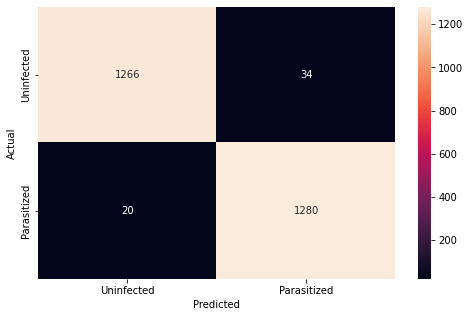

In [27]:
# Plotting the confusion matrix

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model_1.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

In [28]:
backend.clear_session()

In [29]:
def plot_accuracy_1(history):

  N = len(history_model_1.history['accuracy'])

  plt.figure(figsize = (7,7))

  plt.plot(np.arange(0, N), history_model_1.history['accuracy'], label = 'train_accuracy', ls = '--' )
  
  plt.plot(np.arange(0,N), history_model_1.history['val_accuracy'], label = 'val_accuracy', ls = '--')

  plt.title('Accuracy vs Epoch')

  plt.xlabel('Epochs')

  plt.ylabel('Accuracy')

  plt.legend(loc = 'lower right')

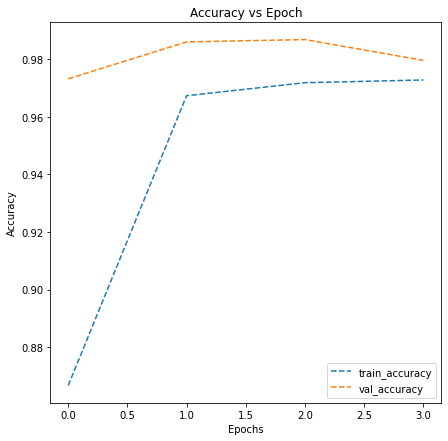

In [30]:

plot_accuracy_1(history)

**Observations and Insights**

In [31]:
#  Model with LeakyRelu as the activation function and Using BatchNormalization regularization technique

from tensorflow.keras.layers import LeakyReLU

model_2 = Sequential()

model_2.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), padding = 'same'))

# model_2.add(Conv2D(32, kernel_size=(3, 3), input_shape=(64, 64, 3),padding = "same"))
model_2.add(LeakyReLU(alpha=0.1))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(BatchNormalization())



model_2.add(Conv2D(32, kernel_size=(3, 3)))

model_2.add(LeakyReLU(alpha=0.1))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(BatchNormalization())


model_2.add(Conv2D(32, kernel_size=(3, 3)))

model_2.add(LeakyReLU(alpha=0.1))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(BatchNormalization())

model_2.add(Flatten())
model_2.add(Dense(512))
model_2.add(LeakyReLU(alpha=0.1))
model_2.add(Dense(2, activation='softmax'))


adam = optimizers.Adam(learning_rate = 0.001)

model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 30, 30, 32)        0

**Think About it - Observations and Insights**

In [32]:
# Compile Model 2

model_2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [33]:
# Using callbacks Model 2

# Using Callbacks

callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

In [34]:
# Fit and train the model

history_model_2 = model_2.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)



Epoch 1/20
624/624 [==============================] - 134s 213ms/step - loss: 0.1690 - accuracy: 0.9337 - val_loss: 0.4992 - val_accuracy: 0.8307
Epoch 2/20
624/624 [==============================] - 133s 213ms/step - loss: 0.0814 - accuracy: 0.9730 - val_loss: 0.0282 - val_accuracy: 0.9956
Epoch 3/20
624/624 [==============================] - 155s 249ms/step - loss: 0.0724 - accuracy: 0.9765 - val_loss: 0.0399 - val_accuracy: 0.9960
Epoch 4/20
624/624 [==============================] - 151s 242ms/step - loss: 0.0606 - accuracy: 0.9798 - val_loss: 0.0526 - val_accuracy: 0.9896


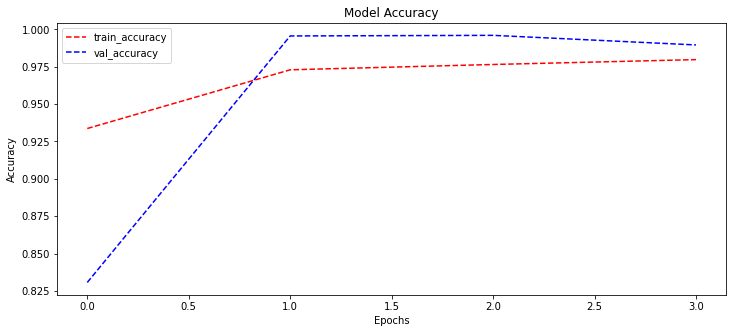

In [77]:
#Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history_model_2.history['accuracy'], color='r',ls = '--')

# history_model_2
plt.plot(history_model_2.history['val_accuracy'], color='b',ls = '--')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

In [36]:
# Evaluating the model on test data

accuracy = model_2.evaluate(test_images, test_labels, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 6s 66ms/step - loss: 0.0857 - accuracy: 0.9731

 Test_Accuracy:- 0.9730769395828247


**Observations and Insight- Model 2 ** 

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1300
           1       0.99      0.96      0.97      1300

    accuracy                           0.97      2600
   macro avg       0.97      0.97      0.97      2600
weighted avg       0.97      0.97      0.97      2600



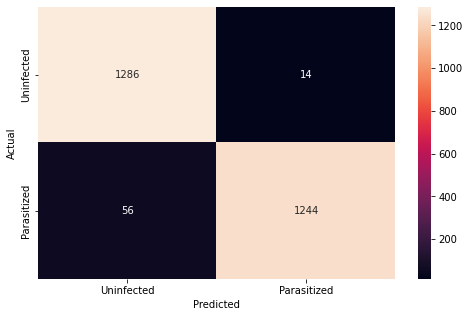

In [37]:
# Plotting the confusion matrix

# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model_2.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

**Think About it - Observation**

In [38]:
# Creating model architecture - Alternative_2_1
model_2_1 = Sequential([
        Conv2D(16, kernel_size = (3,3), input_shape = (64, 64, 3)),
        BatchNormalization(),
        LeakyReLU(),
          
        Conv2D(32, kernel_size = (3,3)),
        BatchNormalization(),
        LeakyReLU(0.1),
        MaxPooling2D(2,2),
        
        Conv2D(64, kernel_size = (3,3)),
        BatchNormalization(),
        LeakyReLU(0.1),
        
        Conv2D(128, kernel_size = (3,3)),
        BatchNormalization(),
        LeakyReLU(0.1),
        MaxPooling2D(2,2),

        Flatten(),
    
        Dense(64),
        BatchNormalization(),
        LeakyReLU(0.1),
        
        Dense(32),
        BatchNormalization(),
        LeakyReLU(),
    
        Dense(16),
        BatchNormalization(),
        LeakyReLU(0.1),
    
        Dense(2, activation = 'softmax')    
        ])

adam = optimizers.Adam(learning_rate = 0.001)
model_2_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 batch_normalization (BatchN  (None, 62, 62, 16)       64        
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 62, 62, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        4640      
                                                                 
 batch_normalization_1 (Batc  (None, 60, 60, 32)       128       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 60, 60, 32)        0

In [39]:
# Compile Model model_2_1

model_2_1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [40]:
# Using callbacks model_2_1

callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

In [41]:
# Fit and train the model_2_1

history_model_2_1 = model_2_1.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 458s 731ms/step - loss: 0.2368 - accuracy: 0.9147 - val_loss: 3.3258 - val_accuracy: 0.0164
Epoch 2/20
624/624 [==============================] - 437s 700ms/step - loss: 0.0956 - accuracy: 0.9671 - val_loss: 0.0464 - val_accuracy: 0.9920
Epoch 3/20
624/624 [==============================] - 432s 692ms/step - loss: 0.0773 - accuracy: 0.9740 - val_loss: 0.4604 - val_accuracy: 0.8454
Epoch 4/20
624/624 [==============================] - 432s 692ms/step - loss: 0.0701 - accuracy: 0.9774 - val_loss: 0.0361 - val_accuracy: 0.9906
Epoch 5/20
624/624 [==============================] - 440s 705ms/step - loss: 0.0598 - accuracy: 0.9786 - val_loss: 0.0409 - val_accuracy: 0.9860
Epoch 6/20
624/624 [==============================] - 429s 687ms/step - loss: 0.0561 - accuracy: 0.9805 - val_loss: 0.0928 - val_accuracy: 0.9669


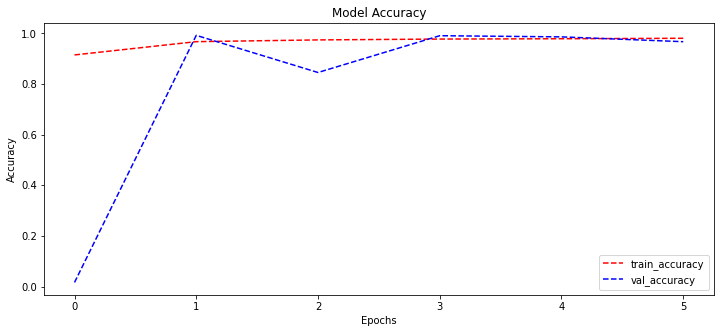

In [81]:
# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

#Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history_model_2_1.history['accuracy'], color='r',ls = '--')

history_model_2_1 

plt.plot(history_model_2_1.history['val_accuracy'], color='b',ls = '--')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train_accuracy', 'val_accuracy'])


plt.show()

In [43]:
# Evaluating the model_2_1 on test data
accuracy = model_2_1.evaluate(test_images, test_labels, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 13s 158ms/step - loss: 0.0647 - accuracy: 0.9781

 Test_Accuracy:- 0.9780769348144531


              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1300
           1       0.97      0.99      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



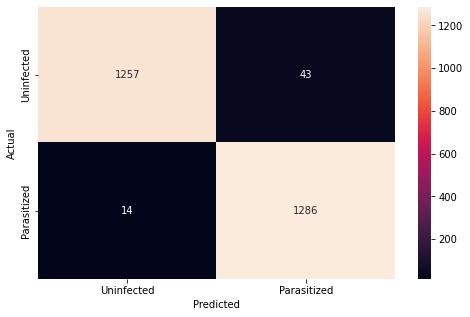

In [44]:
# Plotting the confusion matrix

# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model_2_1.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report

print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

In [47]:
# Model 3 with Data Augmentation
backend.clear_session() # Clearing backend for new model


In [48]:
# Using Image Data generator

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size = 0.2, random_state = 42)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Using ImageDataGenerator to generate images
train_datagen = ImageDataGenerator(horizontal_flip = True, 
                                  zoom_range = 0.5, rotation_range = 30)

val_datagen  = ImageDataGenerator()

# Flowing training images using train_datagen generator
train_generator = train_datagen.flow(x = X_train, y = y_train, batch_size = 64, seed = 42, shuffle = True)

# Flowing validation images using val_datagen generator
val_generator =  val_datagen.flow(x = X_val, y = y_val, batch_size = 64, seed = 42, shuffle = True)


**Think About It :**
Check if the performance of the model can be improved by changing different parameters in the ImageDataGenerator.

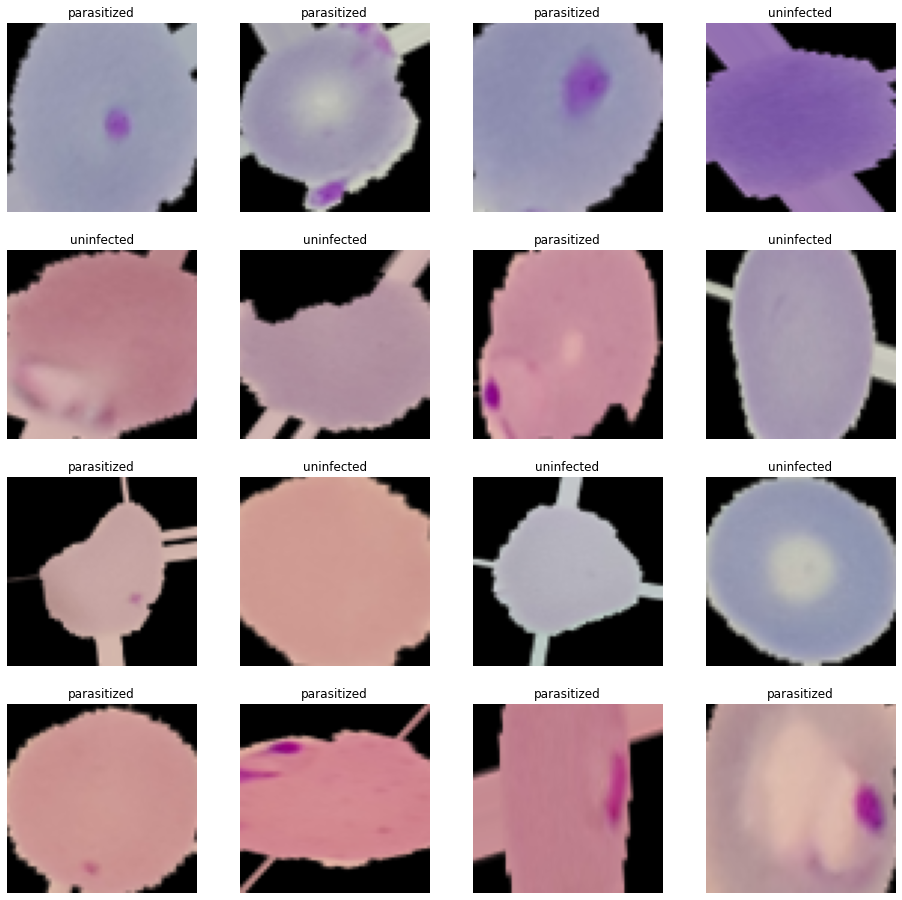

In [49]:
# Visualizing Augmented Images

# Creating an iterable for images and labels from the training data
images, labels = next(train_generator)

# Plotting 16 images from the training data
fig, axes = plt.subplots(4, 4, figsize = (16, 8))

fig.set_size_inches(16, 16)
for (image, label, ax) in zip(images, labels, axes.flatten()):

    ax.imshow(image)

    if label[1] == 1: 

        ax.set_title('parasitized')

    else:

        ax.set_title('uninfected')

    ax.axis('off')


**Observations and insights: __**

In [50]:
# Building Model_3

# model3 = Sequential()

model_3 = Sequential([
    Conv2D(32, (3, 3), input_shape = (64, 64, 3), padding = 'same'),
    #Conv2D(16, kernel_size = (3,3), input_shape = (64, 64, 3)),
    BatchNormalization(),
    LeakyReLU(0.1),
    
    Conv2D(32, kernel_size = (3,3)),
    BatchNormalization(),
    LeakyReLU(0.1),
    MaxPooling2D(2,2),
    
    Conv2D(64, kernel_size = (3,3)),
    BatchNormalization(),
    LeakyReLU(0.1),
    
    Conv2D(128, kernel_size = (3,3)),
    BatchNormalization(),
    LeakyReLU(0.1),
    MaxPooling2D(2,2),
    
    Flatten(),
    
    Dense(64),
    BatchNormalization(),
    LeakyReLU(0.1),
    
    Dense(32),
    BatchNormalization(),
    LeakyReLU(0.1),
    
    Dense(16),
    BatchNormalization(),
    LeakyReLU(0.1),
    
    Dense(2, activation = 'softmax')    
    
    ])

# Use this as the optimizer
adam = optimizers.Adam(learning_rate = 0.001)

model_3.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])

model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 62, 62, 32)       128       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 62, 62, 32)        0

In [51]:
# Using Callbacks

callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]
             

In [52]:
# Fit and Train the model
history_3 = model_3.fit(train_generator, 
                                  validation_data = val_generator,
                                  batch_size = 64, callbacks = callbacks,
                                  epochs = 20, verbose = 1)


Epoch 1/20
312/312 [==============================] - 579s 2s/step - loss: 0.3153 - accuracy: 0.8743 - val_loss: 0.4900 - val_accuracy: 0.7648
Epoch 2/20
312/312 [==============================] - 569s 2s/step - loss: 0.1839 - accuracy: 0.9329 - val_loss: 0.2306 - val_accuracy: 0.9235
Epoch 3/20
312/312 [==============================] - 564s 2s/step - loss: 0.1628 - accuracy: 0.9430 - val_loss: 0.1051 - val_accuracy: 0.9661
Epoch 4/20
312/312 [==============================] - 565s 2s/step - loss: 0.1500 - accuracy: 0.9466 - val_loss: 0.0788 - val_accuracy: 0.9732
Epoch 5/20
312/312 [==============================] - 565s 2s/step - loss: 0.1420 - accuracy: 0.9482 - val_loss: 0.1083 - val_accuracy: 0.9635
Epoch 6/20
312/312 [==============================] - 569s 2s/step - loss: 0.1419 - accuracy: 0.9494 - val_loss: 0.0863 - val_accuracy: 0.9718


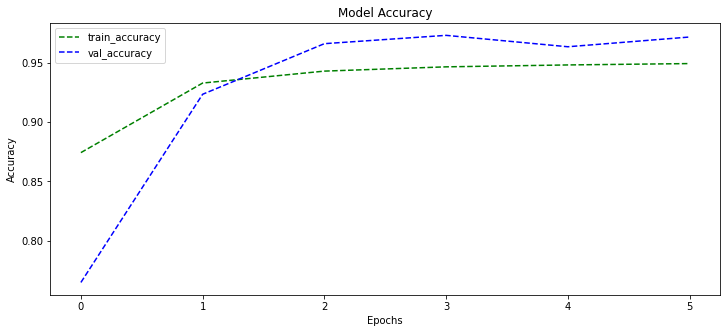

In [82]:
# Plot the train and validation accuracy

#Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history_3.history['accuracy'], color='g',ls = '--')

#history_model_3
plt.plot(history_3.history['val_accuracy'], color='b',ls = '--')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()


In [54]:
# Evaluating the model on test data
accuracy_3 = model_3.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy_3[1])


82/82 [==============================] - 17s 206ms/step - loss: 0.0795 - accuracy: 0.9754

 Test_Accuracy:- 0.9753845930099487


              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1300
           1       0.97      0.98      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



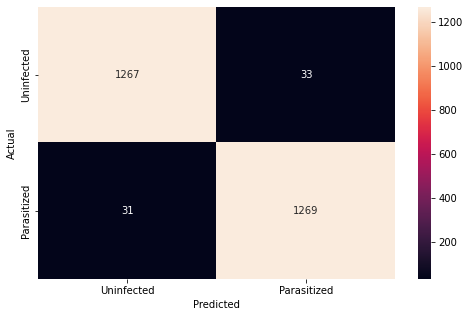

In [55]:
# Plotting the classification report and confusion matrix

# Plotting the confusion matrix

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model_3.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

In [56]:
# Model 3 with Data Augmentation
backend.clear_session() # Clearing backend for new model

In [57]:
# Now, let us try to use a pretrained model like VGG16 and check how it performs on our data.

# Pre-trained model (VGG16)


# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [58]:
from tensorflow.keras.applications.vgg16 import VGG16

from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import Model

vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (64, 64, 3))

vgg.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                              

In [59]:
transfer_layer = vgg.get_layer('block5_pool')

vgg.trainable = False

# Add classification layers on top of it  
x = Flatten()(transfer_layer.output)  # Flatten the output from the 3rd block of the VGG16 model

x = Dense(256, activation = 'relu')(x)

# Similarly add a dense layer with 128 neurons
x = Dropout(0.3)(x)

# Add a dense layer with 64 neurons
x = BatchNormalization()(x)

pred = Dense(2, activation = 'softmax')(x)

model_4 = Model(vgg.input, pred) # Initializing the model

In [60]:
# Compile Model model_4

model_4.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [61]:
# Using callbacks model_4

callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

In [62]:
# Fitting the model and running the model for 10 epochs
history = model_4.fit(
            train_images, train_labels,
            epochs = 10,
            callbacks = callbacks,
            batch_size = 32,
            validation_split = 0.2,
            verbose = 1
)

Epoch 1/10
624/624 [==============================] - 1066s 2s/step - loss: 0.2329 - accuracy: 0.9107 - val_loss: 0.2065 - val_accuracy: 0.9349
Epoch 2/10
624/624 [==============================] - 1066s 2s/step - loss: 0.1900 - accuracy: 0.9280 - val_loss: 0.2014 - val_accuracy: 0.9373
Epoch 3/10
624/624 [==============================] - 1072s 2s/step - loss: 0.1849 - accuracy: 0.9303 - val_loss: 0.1062 - val_accuracy: 0.9772
Epoch 4/10
624/624 [==============================] - 1075s 2s/step - loss: 0.1748 - accuracy: 0.9326 - val_loss: 0.2082 - val_accuracy: 0.9333
Epoch 5/10
624/624 [==============================] - 1069s 2s/step - loss: 0.1698 - accuracy: 0.9357 - val_loss: 0.0913 - val_accuracy: 0.9820
Epoch 6/10
624/624 [==============================] - 1072s 2s/step - loss: 0.1649 - accuracy: 0.9381 - val_loss: 0.4185 - val_accuracy: 0.8444
Epoch 7/10
624/624 [==============================] - 1070s 2s/step - loss: 0.1584 - accuracy: 0.9404 - val_loss: 0.1452 - val_accuracy:

In [63]:
# Evaluating the model on test data - Model_4
accuracy = model_4.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy[1])


82/82 [==============================] - 115s 1s/step - loss: 0.1551 - accuracy: 0.9431

 Test_Accuracy:- 0.9430769085884094


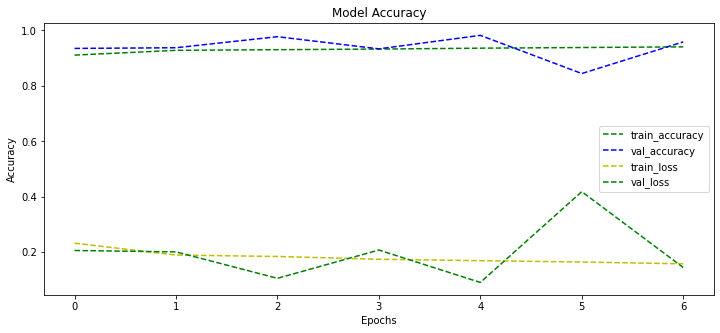

In [83]:
# Plot the train and validation accuracy

#Plot the training history
plt.figure(figsize=(12, 5))

plt.plot(history.history['accuracy'], color='g',ls = '--')

#history_model_4
plt.plot(history.history['val_accuracy'], color='b',ls = '--')

plt.plot(history.history['loss'], color='y',ls = '--')


plt.plot(history.history['val_loss'], color='g',ls = '--')

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train_accuracy', 'val_accuracy','train_loss','val_loss'])
plt.show()


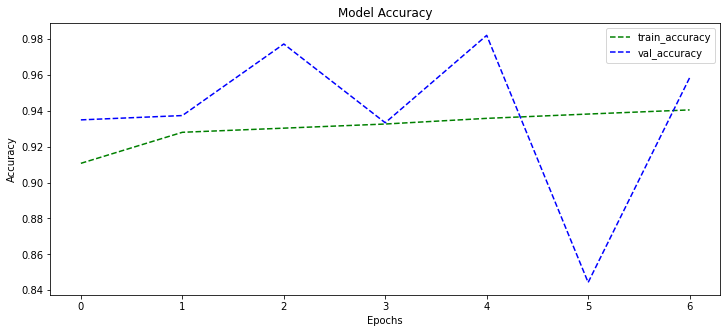

In [84]:
# Plot the train and validation accuracy-4

#Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='g',ls = '--')

#history_model_4
plt.plot(history.history['val_accuracy'], color='b', ls= '--')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()


              precision    recall  f1-score   support

           0       0.96      0.93      0.94      1300
           1       0.93      0.96      0.94      1300

    accuracy                           0.94      2600
   macro avg       0.94      0.94      0.94      2600
weighted avg       0.94      0.94      0.94      2600



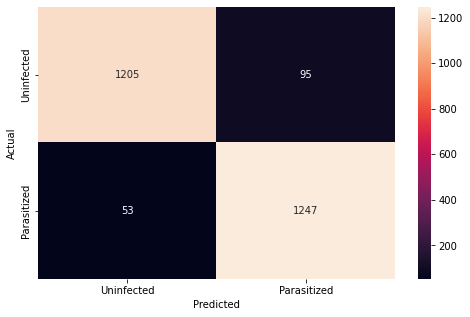

In [85]:
# Plot the confusion matrix and generate a classification report for the model_4


# Plotting the confusion matrix

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model_4.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()


In [67]:
# Now, let us try to use a pretrained model like VGG19 and check how it performs on our data.

# Pre-trained model (VGG19)


# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [68]:
from tensorflow.keras.applications.vgg19 import VGG19

from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import Model

vgg = VGG19(include_top = False, weights = 'imagenet', input_shape = (64, 64, 3))

vgg.summary()

80150528/80134624 [==============================] - 1s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                              

In [69]:
transfer_layer = vgg.get_layer('block5_pool')

vgg.trainable = False

# Add classification layers on top of it  
x = Flatten()(transfer_layer.output)  # Flatten the output from the 3rd block of the VGG19 model

x = Dense(256, activation = 'relu')(x)

# Similarly add a dense layer with 128 neurons
x = Dropout(0.3)(x)

# Add a dense layer with 64 neurons
x = BatchNormalization()(x)

pred = Dense(2, activation = 'softmax')(x)

model_5 = Model(vgg.input, pred) # Initializing the model

In [70]:
# Compile Model model_5

model_5.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [71]:
# Using callbacks model_5

callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

In [72]:
# Fitting Model_5 - 10 Epochs

history_model_5 = model_5.fit(
            train_images, train_labels,
            epochs = 10,
            callbacks = callbacks,
            batch_size = 32,
            validation_split = 0.2,
            verbose = 1
)

Epoch 1/10
624/624 [==============================] - 1360s 2s/step - loss: 0.2708 - accuracy: 0.8917 - val_loss: 0.0974 - val_accuracy: 0.9834
Epoch 2/10
624/624 [==============================] - 1356s 2s/step - loss: 0.2200 - accuracy: 0.9135 - val_loss: 0.1709 - val_accuracy: 0.9563
Epoch 3/10
624/624 [==============================] - 1350s 2s/step - loss: 0.2114 - accuracy: 0.9189 - val_loss: 0.2063 - val_accuracy: 0.9423


In [73]:
# Evaluating the model on test data - Model_5
accuracy_5 = model_5.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy_5[1])

82/82 [==============================] - 147s 2s/step - loss: 0.2123 - accuracy: 0.9212

 Test_Accuracy:- 0.9211538434028625


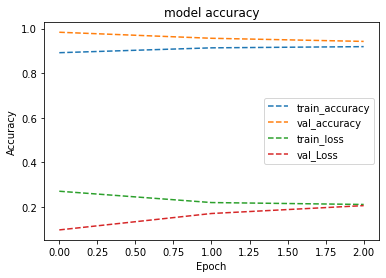

In [88]:
# Plot the train and validation accuracy-5


import matplotlib.pyplot as plt
plt.plot(history_model_5.history["accuracy"], ls = '--')
plt.plot(history_model_5.history['val_accuracy'], ls= '--')
plt.plot(history_model_5.history['loss'],ls= '--')
plt.plot(history_model_5.history['val_loss'],ls= '--')
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['train_accuracy', 'val_accuracy','train_loss','val_Loss'])
plt.show()

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      1300
           1       0.90      0.95      0.92      1300

    accuracy                           0.92      2600
   macro avg       0.92      0.92      0.92      2600
weighted avg       0.92      0.92      0.92      2600



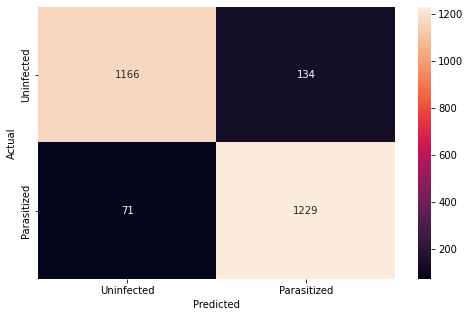

In [90]:
# Plot the confusion matrix and generate a classification report for the model_5


# Plotting the confusion matrix

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model_5.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

In [91]:
# HSV Image Comparisons

#Converting RGB to HSV of Images using OpenCV

import cv2

gfx=[]   # to hold the HSV image array

for i in np.arange(0, 100, 1):

  a = cv2.cvtColor(train_images[i], cv2.COLOR_BGR2HSV)
  
  gfx.append(a)

gfx = np.array(gfx)

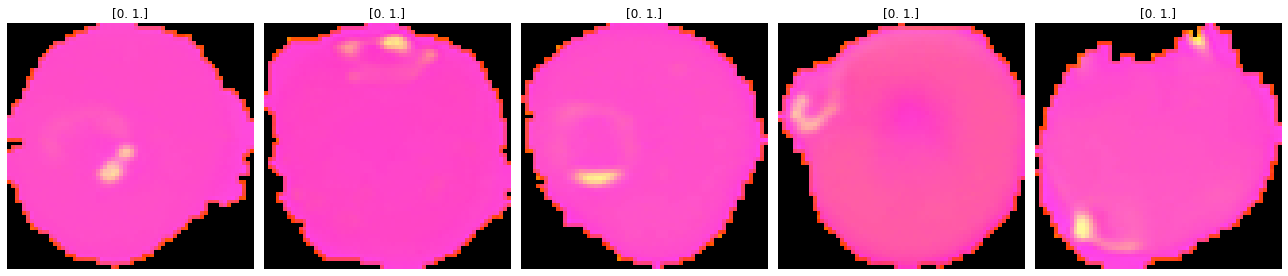

In [92]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(gfx[i])

  ax[t].set_axis_off()
  
  fig.tight_layout()

In [93]:
# Converting the test data

# Test Data

import cv2

gfx=[]   # to hold the HSV image array

for i in np.arange(0, 100, 1):

  a = cv2.cvtColor(test_images[i], cv2.COLOR_BGR2HSV)
  
  gfx.append(a)

gfx = np.array(gfx)

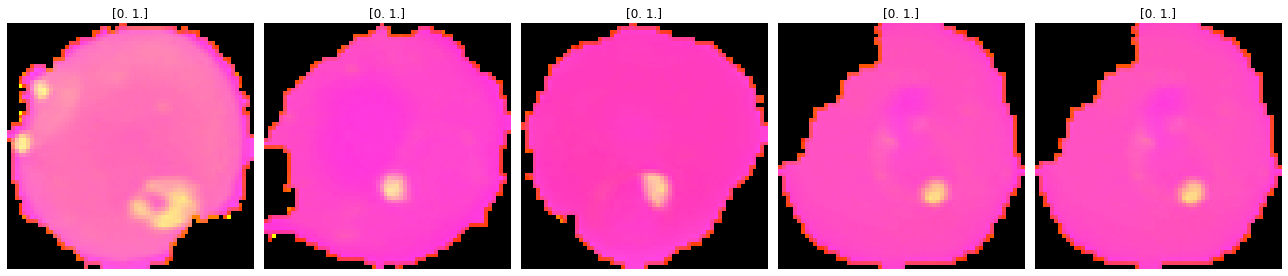

In [94]:
# Visualize Test Data
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = test_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(gfx[i])

  ax[t].set_axis_off()
  
  fig.tight_layout()

Observations and Insight Both train and test images display a considerable number of parasitized images.Widely infected blood cells have a spread of the virus across the blood cell as displayed in blue and yellow markers.